# p-Hub problem



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#p-Hub-[1]" data-toc-modified-id="p-Hub-[1]-1.1">p-Hub <sup>[1]</sup></a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-environment-by-importing-libraries" data-toc-modified-id="Set-up-the-environment-by-importing-libraries-2.1">Set up the environment by importing libraries</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Case1.-Solving-p-Hub-problems-with-synthetic-data" data-toc-modified-id="Case1.-Solving-p-Hub-problems-with-synthetic-data-3.1">Case1. Solving p-Hub problems with synthetic data</a></span></li><li><span><a href="#Case2.-Solving-p-Hub-problems-with-real-world-data" data-toc-modified-id="Case2.-Solving-p-Hub-problems-with-real-world-data-3.2">Case2. Solving p-Hub problems with real-world data</a></span></li></ul></li></ul></div>

## Problem Description

###  p-Hub <sup>[1]</sup>
*Parameters*:
* $N$:  Set of nodes
* $C_{ij}$: Distance from node $i \in N$ to node $j\in N$. It is assumed that $C_{ii} = 0 (i\in N)$ and that the distances satisty the triangle inequality collection
* $P^{C},P^{D},P^{T}$: Collection,Distribution and Transfer cost
* $W_{ij}$: Flow originated at node $i\in N$ that is destined to node $j\in N$
* $O_i=\sum_{j}W_{ij}$: Total flow originated at node $i\in N$
* $D_i=\sum_{j}W_{ji}$: Total flow destined to node $i\in N$
* $y_{ikh}$: Amount of flow originated at node $i \in N$ that is routed via hubs $k$ and $h$ in this order ($i,k,h\in N$)

*Decision variables*:
$$\begin{array}{lll}
x_{ik}= \begin{cases}1, & \text { if demand } i \text { is allocated to hub } k \\ 0, & \text { else }\end{cases}\\
\end{array}
$$


###  Integer programming model:
$$
\begin{array}{lll}
\text{min} & \sum_{ik}P^{C}C_{ik}O_{i}x_{ik}+\sum_{ikh}P^{T}C_{kh}y_{ikh}+\sum_{ik}P^{D}C_{ki}D_{i}x_{ik} & (1) \\
\text{s.t.} & \sum_{k}x_{ik}=1, \quad \forall i & (2) \\
& x_{ik}\leq x_{kk}, \quad \forall i,k & (3) \\
& \sum_{k}x_{kk}=H & (4) \\
& \sum_{h}y_{ikh}-\sum_{h}y_{ihk}=O_{i}x_{ik}-\sum_{j}W_{ij}x_{jk},\quad \forall i,k & (5) \\
& \sum_{h\neq k}y_{ikh}\leq O_{i}x_{ik},\quad \forall i,k & (6)\\
& x_{ik}\in \{0,1\} \quad \forall i,k & (7)\\
& y_{ikh}\geq 0 \quad \forall i,k,h & (8)\\
\end{array}
$$

[1] Campbell J F. Hub location and the p-hub median problem[J]. Operations research, 1996, 44(6): 923-935.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib, pandas and Hispot libraries to set up an environment

In [1]:
import random
import numpy as np
import pandas as pd
from pulp import *
import matplotlib.pyplot as plt
from hispot.FLP import PHub

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open source linear programming solvers, such as `CBC` and `GLPK`; in addition, it also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`.
The default is CBC, and PuLP will be installed by default. For most problems, the CBC open source solver from COIN-OR will suffice.
You can use `listSolvers(onlyAvailable=True)` to check the available solvers.

In [2]:
np.random.seed(0) # random seed
solver_list = listSolvers(onlyAvailable=True)
print(solver_list) 

Restricted license - for non-production use only - expires 2026-11-23


['GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD', 'COIN_CMD']


## Example

In this part, we will input synthetic data and real-world data and display them as two examples to represent random cases and real-world scenarios, respectively.

### Case1. Solving p-Hub problems with synthetic data

Generate problem with synthetic data

In [3]:
num_points = 10
num_hubs = 3
PC, PT, PD = 1, 1, 1
# PC, PT, PD = 1.0, 0.75, 1.25
weight = np.random.randint(1, 2, size=(num_points, num_points))
points = [(random.random(), random.random()) for i in range(num_points)]
points_np = np.array(points)


Output optimal solution

In [4]:
%%time
hubs, assigns, obj = PHub(num_points=num_points,
                          points=points_np,
                          solver=PULP_CBC_CMD(),
                          num_located=num_hubs,
                          weight=weight,
                          collect_cost=PC,
                          transfer_cost=PT,
                          distribution_cost=PD).prob_solve()

Status: Optimal
Selected Hubs = [0, 2, 5]
Assigned relationships =  {0: [0, 9], 2: [1, 2, 4], 5: [3, 5, 6, 7, 8]}
Minimum total cost = 57.6497284033071
CPU times: total: 125 ms
Wall time: 492 ms


Visualize optimal solution

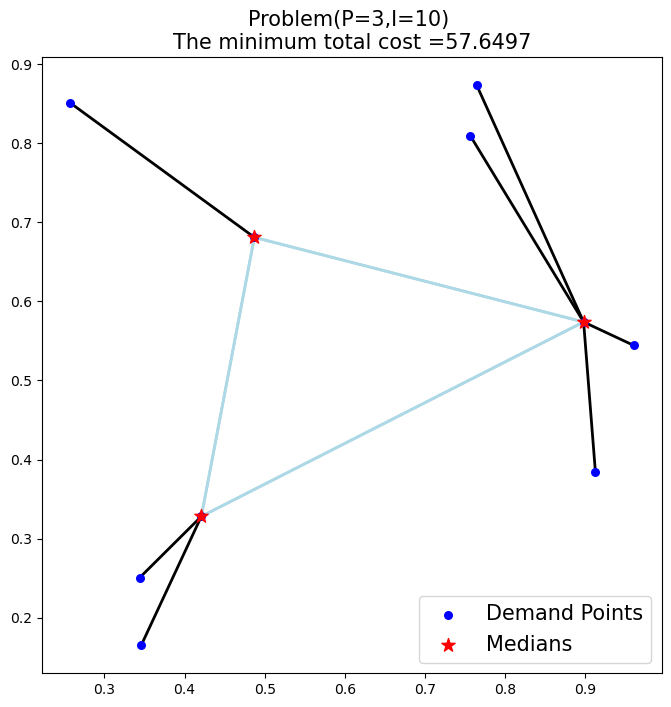

In [5]:
plt.figure(figsize=(8,8))
name = 'Problem(P=' + str(num_hubs) + ',I=' + str(num_points) + ') \nThe minimum total cost =' + str(round(obj,4))
plt.title(name, fontsize = 15)

#Points
plt.scatter(*zip(*points_np), c='Blue', marker='o',s=30, label = 'Demand Points', zorder=2)
plt.scatter(*zip(*points_np[hubs]), c='Red', marker='*',s=100,label = 'Medians',zorder=3)
#Lines
for i in assigns:
    center_point = points_np[i]
    for j in assigns[i]:
        demand_points = points_np[j]
        pts = [points[i], points[j]]
        plt.plot(*zip(*pts), c='Black', linewidth=2, zorder=1)
for i in hubs:
    for j in hubs:
        if i != j:
            h = [points[i], points[j]]
            plt.plot(*zip(*h), c='Lightblue', linewidth=2, zorder=1)
# plt.grid(True)   
plt.legend(loc='best', fontsize = 15) 
plt.show()

### Case2. Solving p-Hub problems with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [6]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

We select Fengtai District of Beijing the study area and read partial poi points in Fengtai District.

In [7]:
%%time
region=gpd.read_file("../data/guangzhou/南沙区.shp")
region.head(2)

CPU times: total: 62.5 ms
Wall time: 57.6 ms


,地名,区划码,year,Area,eng,Shape_Leng,Shape_Area,geometry
0,南沙区,440115,2023,661.244108,Nansha,1.841329,0.058095,"MULTIPOLYGON (((113.56252 22.86176, 113.5668 2..."


Partial POI data in Fengtai district

In [8]:
%%time
poi = gpd.read_file("../data/guangzhou/南沙区_港口码头.shp")
poi.shape[0]

CPU times: total: 0 ns
Wall time: 4.51 ms


54

In [9]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

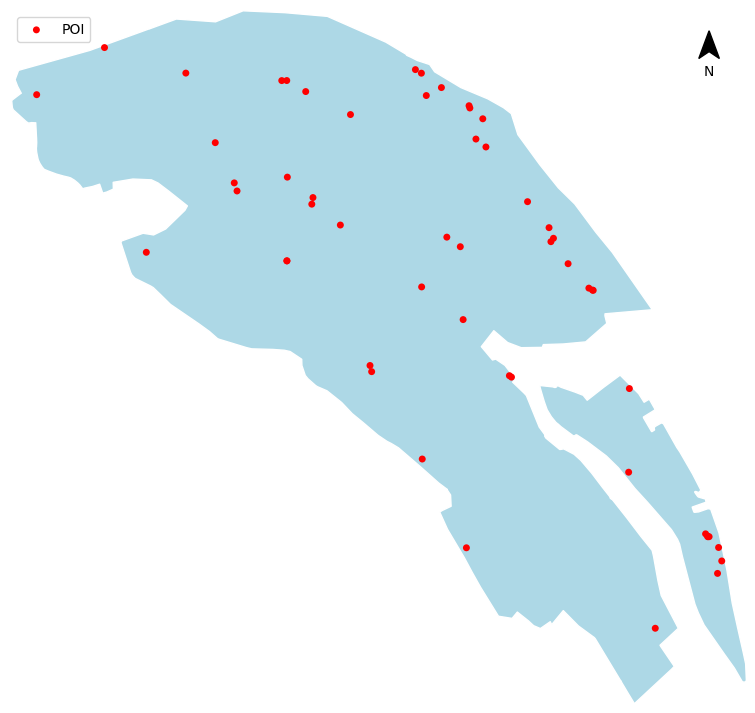

In [10]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="lightblue",
                   figsize=(10, 9))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='red',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)

Generate problem with real-world data

In [11]:
data = poi[['lon', 'lat']]
num_points = poi.shape[0]
num_hubs = 5
points = [(data['lon'][i], data['lat'][i]) for i in range(num_points)]
points_np = np.array(points)
PC, PT, PD = 1.0, 0.75, 1.25
weight = np.random.randint(1, 2, size=(num_points, num_points))

Output optimal solution

In [12]:
%%time
hubs, assigns, obj = PHub(num_points=num_points,
                          points=points_np,
                          solver=GUROBI(),
                          num_located=num_hubs,
                          weight=weight,
                          collect_cost=PC,
                          transfer_cost=PT,
                          distribution_cost=PD).prob_solve()

Status: Optimal
Selected Hubs = [8, 22, 34, 36, 44]
Assigned relationships =  {8: [0, 3, 4, 5, 6, 7, 8, 9], 22: [1, 2, 20, 21, 22, 23, 24, 25, 26, 27, 39, 40, 46, 47, 48, 49, 50], 34: [10, 28, 29, 30, 31, 32, 33, 34, 42, 51, 52], 36: [15, 16, 17, 18, 19, 36, 37, 38, 53], 44: [11, 12, 13, 14, 35, 41, 43, 44, 45]}
Minimum total cost = 491.9274124556545
CPU times: total: 7.91 s
Wall time: 25min 43s


prepare the LineString and center Points to plot the solution

In [22]:
from shapely.geometry import LineString
crs = 'EPSG:4326'
lines = gpd.GeoDataFrame(columns=['id', 'geometry'], crs=crs)
k = 0
for i in assigns:
    center = points_np[i]
    for j in assigns[i]:
        assign = points_np[j]
        line = LineString([center, assign])
        lines.loc[k] = [k+1, line]
        k = k+1
for m in hubs:
    for n in hubs:
        if m != n:
            c1 = points_np[m]
            c2 = points_np[n]
            line = LineString([c1, c2])
            lines.loc[k] = [k+1, line]
            k = k+1
center_points = poi.iloc[hubs]

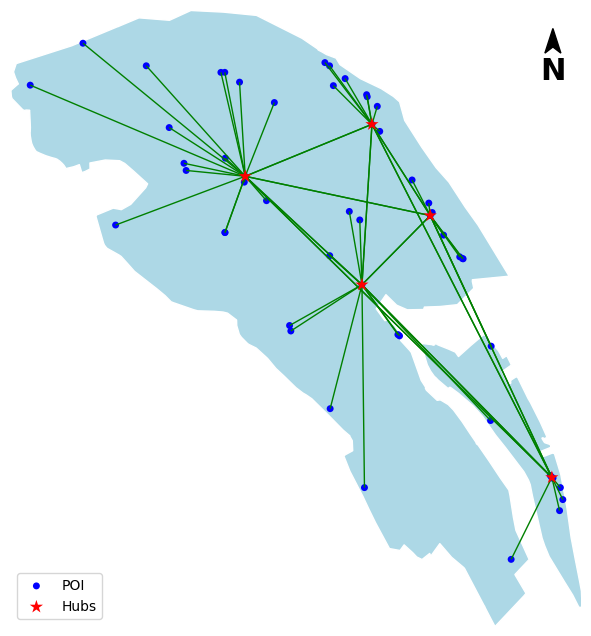

In [23]:
ax = gplt.sankey(lines, 
                 projection=gcrs.Mollweide(),
                 linewidth=1,
                 color='green',
                 zorder=3,
                 figsize=(10, 8),)
gplt.polyplot(region,
              projection=gcrs.AlbersEqualArea(),
              edgecolor="white", 
              facecolor="lightblue",
              zorder=1,
              ax=ax,)
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='blue',
               alpha=1,
               linewidth=0,
               label='POI',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points, 
               extent=region.total_bounds,
               s=10,
               color='red',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Hubs',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='lower left')

In [24]:
import math

def render_scale_bar(ax, x=0.05, y=0.05, length_frac=0.25, segments=2,
                     color='black', unit='m', fontsize=9, approx_lat=None, 
                     fixed_max_distance=4000):
    # 计算实际比例尺长度（根据地图坐标系）
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    
    # 计算每度对应的米数（如果是经纬度坐标）
    if approx_lat is not None:
        m_per_deg = 111320.0 * math.cos(math.radians(approx_lat))
        map_width_m = (x1 - x0) * m_per_deg
    else:
        # 假设是投影坐标系，直接使用坐标差值
        map_width_m = x1 - x0
    
    # 根据固定距离计算比例尺应该占的比例
    actual_length_frac = fixed_max_distance / map_width_m
    # 限制比例尺不要太长，最多占图幅的30%
    actual_length_frac = min(actual_length_frac, 0.3)
    
    # 画主线（使用计算出的实际长度比例）
    ax.plot([x, x+actual_length_frac], [y, y], transform=ax.transAxes, color=color, lw=2)

    # 使用固定的最大距离值
    total_len_m = fixed_max_distance

    # 刻度与数字
    for s in range(segments + 1):
        xs = x + actual_length_frac * s / segments
        ax.plot([xs, xs], [y-0.01, y+0.01], transform=ax.transAxes, color=color, lw=1)
        val = total_len_m * s / segments
        label = '0' if s == 0 else f'{int(val):,}'
        ax.text(xs, y-0.035, label, ha='center', va='top', transform=ax.transAxes, fontsize=fontsize)

    # 单位（放在比例尺右端，增加间距避免重合）
    ax.text(x + actual_length_frac + 0.02, y-0.035, unit, ha='left', va='top',
            transform=ax.transAxes, fontsize=fontsize)

In [25]:
# 绘制指北针
def render_north_arrow(ax, x, y, size, ratio = 1):
    # ax： matplotlib的坐标轴对象 绘制指北针
    # x, y： 指北针的左下角坐标
    # size： 指北针的大小
    # ratio： 指北针的比例 默认为1
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2.5, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=22, fontweight='bold')

In [26]:
import os
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib import patheffects as pe

def plot_result_pretty(ls, opt_sites, radius_m=2000, roads_path="data/HuLaTang/Export_Output_2.shp",
                       demand_gridsize=60, demand_cmap="magma", roads_color="#9e9e9e", roads_alpha=0.35,
                       norm_mode="log", vmin_q=0.10, vmax_q=0.995, gamma=0.6, reduce="sum",
                       overlay_points=True, overlay_points_size=6, overlay_points_alpha=0.28,
                       overlay_hex_grid=False, hex_grid_color="#222222", hex_grid_alpha=0.18, hex_grid_lw=0.25,
                       circle_style="ring", show_heat=True, show_colorbar=False, lang="zh", title=None):
    """
    更美观的选址结果绘图：需求热度（hexbin）+ 道路 + 站点 + 服务圈。

    Args:
        ls (GeoDataFrame): 需求点，包含 POINT_X/POINT_Y 或 X/Y 以及 All_pop（可选）。
        opt_sites (DataFrame): 入选站点行，包含 x/y 列（point_x_1/POINT_X...）。
        radius_m (float): 服务半径（与坐标同单位）。
        roads_path (str): 道路 shp 文件路径。
        demand_gridsize (int): 六边形网格大小。
        demand_cmap (str): 需求热度配色。
        roads_color (str): 道路颜色。
        roads_alpha (float): 道路透明度。
        norm_mode (str): 'log' | 'power' | 'linear'。
        vmin_q, vmax_q (float): 需求分位裁剪，仅用于显示。
        gamma (float): PowerNorm 的 gamma。
        reduce (str): 'sum' 或 'mean' 作为 hexbin 聚合方式。
        overlay_points (bool): 是否叠加需求点散点。
        circle_style (str): 'fill' | 'ring' 服务圈样式。
        show_colorbar (bool): 是否显示色标。
        lang (str): 'zh' 或 'en'，控制标签语言。
        title (str|None): 自定义标题。
    """
    # 语言包
    L = {
        'zh': {
            'road': '道路网络', 'demand': '需求点', 'selected': '新建门店', 'current': '现有门店',
            'title': '选址结果与需求强度', 'subtitle': lambda n, r: f"门店数：{n}  半径：{r} m"
        },
        'en': {
            'road': 'Road network', 'demand': 'Demand points', 'selected': 'Selected facilities', 'current': 'Current sites',
            'title': 'Optimized Facilities with Demand Heat', 'subtitle': lambda n, r: f"Facilities: {n}  Radius: {r} m"
        }
    }
    LL = L.get(lang, L['zh'])

    # 1) 需求列与坐标列
    pop_col = None
    if 'speed_pct_freeflow_rev' in ls.columns:
        pop_col = 'speed_pct_freeflow_rev'
    else:
        for c in ls.columns:
            if str(c).lower() == 'all_pop':
                pop_col = c
                break

    # 支持多种坐标列命名：X/Y、POINT_X/POINT_Y、x/y、lon/lat、lng/latitude 等
    def pick_xy_from_ls(df):
        lower_to_orig = {str(c).lower(): c for c in df.columns}
        def choose(candidates):
            for name in candidates:
                if name in lower_to_orig:
                    return lower_to_orig[name]
            return None
        x_col = choose(['x', 'point_x', 'pointx', 'lon', 'lng', 'longitude', 'point_x_1', 'point_x'])
        y_col = choose(['y', 'point_y', 'pointy', 'lat', 'latitude', 'point_y_1', 'point_y'])
        if x_col is None and 'POINT_X' in df.columns:
            x_col = 'POINT_X'
        if y_col is None and 'POINT_Y' in df.columns:
            y_col = 'POINT_Y'
        if x_col is None and 'X' in df.columns:
            x_col = 'X'
        if y_col is None and 'Y' in df.columns:
            y_col = 'Y'
        if x_col is None or y_col is None:
            raise ValueError("ls must contain coordinate columns (X/Y, POINT_X/POINT_Y, or lon/lat).")
        return x_col, y_col

    dx, dy = pick_xy_from_ls(ls)

    # 2) 站点坐标列
    def pick_xy_cols(df):
        x_col = None
        y_col = None
        # 支持更多坐标命名：x/y、X/Y、POINT_X/POINT_Y、lon/lat、lng/latitude
        lower_to_orig = {str(c).lower(): c for c in df.columns}
        def choose(candidates):
            for name in candidates:
                if name in lower_to_orig:
                    return lower_to_orig[name]
            return None
        x_col = choose(['x', 'point_x', 'pointx', 'lon', 'lng', 'longitude', 'point_x_1', 'point_x'])
        y_col = choose(['y', 'point_y', 'pointy', 'lat', 'latitude', 'point_y_1', 'point_y'])
        if x_col is None and 'POINT_X' in df.columns: x_col = 'POINT_X'
        if y_col is None and 'POINT_Y' in df.columns: y_col = 'POINT_Y'
        if x_col is None and 'X' in df.columns: x_col = 'X'
        if y_col is None and 'Y' in df.columns: y_col = 'Y'
        if x_col is None or y_col is None:
            raise ValueError('opt_sites must contain coordinate columns (X/Y, POINT_X/POINT_Y, or lon/lat).')
        return x_col, y_col

    x_col, y_col = pick_xy_cols(opt_sites)

    # 3) 画布
    fig, ax = plt.subplots(figsize=(20, 16))

    # 4) 道路底图
    if isinstance(roads_path, str) and os.path.exists(roads_path):
        try:
            roads = gpd.read_file(roads_path)
            try:
                roads.plot(ax=ax, color=roads_color, linewidth=0.4, alpha=roads_alpha, zorder=1, label=LL['road'])
            except Exception:
                pass
        except Exception:
            pass

    # 5) 需求热度（hexbin），分位裁剪 + 归一
    try:
        if show_heat:
            values = ls[pop_col].to_numpy() if pop_col is not None else None
            if values is not None:
                vmin = float(np.quantile(values, vmin_q)) if 0 <= vmin_q < 1 else None
                vmax = float(np.quantile(values, vmax_q)) if 0 < vmax_q <= 1 else None
                if vmin is not None and vmax is not None and vmax > vmin:
                    values_clipped = np.clip(values, vmin, vmax)
                else:
                    values_clipped = values
                if norm_mode == 'log':
                    from matplotlib.colors import LogNorm
                    norm = LogNorm(vmin=max(values_clipped.min(), 1e-6), vmax=values_clipped.max())
                elif norm_mode == 'power':
                    from matplotlib.colors import PowerNorm
                    norm = PowerNorm(gamma=gamma, vmin=values_clipped.min(), vmax=values_clipped.max())
                else:
                    norm = None
            else:
                values_clipped = None
                norm = None

            reducer = np.sum if reduce == 'sum' else np.mean
            hb = ax.hexbin(ls[dx].to_numpy(), ls[dy].to_numpy(),
                           C=values_clipped,
                           reduce_C_function=reducer if values_clipped is not None else None,
                           gridsize=demand_gridsize, cmap=demand_cmap, bins=None, mincnt=1,
                           linewidths=0, alpha=0.92, zorder=5, norm=norm)
            try:
                hb.set_edgecolor('face')
            except Exception:
                pass
            if show_colorbar and values is not None:
                cbar = fig.colorbar(hb, ax=ax, shrink=0.8)
                cbar.ax.tick_params(labelsize=10)
    except Exception:
        if show_heat:
            sc = ax.scatter(ls[dx], ls[dy], c=ls[pop_col] if pop_col is not None else '#9ecae1',
                            s=8, cmap=demand_cmap, edgecolors='none', zorder=5)
            if show_colorbar and pop_col is not None:
                fig.colorbar(sc, ax=ax, shrink=0.8)

    # 6) 可选叠加：需求点
    if overlay_points:
        try:
            ax.scatter(ls[dx], ls[dy], s=overlay_points_size, c='#2c3e50', alpha=overlay_points_alpha,
                       linewidths=0, zorder=6, label=LL['demand'])
        except Exception:
            pass

    # 7) 门店与服务圈
    legend_flag = {'selected': False, 'current': False}
    for _, row in opt_sites.iterrows():
        cx = float(row[x_col])
        cy = float(row[y_col])
        is_current = ('current' in opt_sites.columns and bool(row['current']) is True)
        if is_current:
            coll = ax.scatter(cx, cy, s=46, marker='o', facecolor='white', edgecolor='red', linewidths=1.2,
                              zorder=10, label=LL['current'] if not legend_flag['current'] else None)
            try:
                coll.set_path_effects([pe.withStroke(linewidth=2.2, foreground='white')])
            except Exception:
                pass
            legend_flag['current'] = True
            circ_kwargs = dict(facecolor='none', edgecolor='red', lw=1.0, alpha=0.9, zorder=9)
            if circle_style == 'fill':
                circ_kwargs.update(facecolor='none')
            ax.add_artist(plt.Circle((cx, cy), radius_m, **circ_kwargs))
        else:
            coll = ax.scatter(cx, cy, s=52, marker='o', facecolor='#FF8C42', edgecolor='white', linewidths=0.8,
                              zorder=11, label=LL['selected'] if not legend_flag['selected'] else None)
            try:
                coll.set_path_effects([pe.withStroke(linewidth=2.0, foreground='white')])
            except Exception:
                pass
            legend_flag['selected'] = True
            if circle_style == 'fill':
                circ = plt.Circle((cx, cy), radius_m, facecolor='#FF8C42', edgecolor='#FF8C42', lw=0.6, alpha=0.12, zorder=8)
            else:
                circ = plt.Circle((cx, cy), radius_m, facecolor='none', edgecolor='#FF8C42', lw=1.2, ls='--', alpha=0.85, zorder=9)
            ax.add_artist(circ)

    # 8) 外观
    ax.axis('scaled')
    ax.tick_params(axis='both', left=False, top=False, right=False,
                   bottom=False, labelleft=False, labeltop=False,
                   labelright=False, labelbottom=False)
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.0)
        spine.set_edgecolor('#333333')
    ax.margins(x=0.02, y=0.02)

    ttl = title if title is not None else LL['title']
    ax.set_title(ttl + "\n" + LL['subtitle'](len(opt_sites), int(radius_m)), fontsize=18, pad=12)
    try:
        #render_scale_bar(ax=ax, x=0.05, y=0.05)
        #render_scale_bar(ax, x=0.05, y=0.95, length_frac=0.25, segments=2,
                 #color='black', unit='m', fontsize=9, approx_lat=approx_lat, 
                 #fixed_max_distance=4000)
        render_north_arrow(ax=ax, x=0.95, y=0.95, size=0.03, ratio=0.7)
    except Exception:
        pass

    # 9) 图例（统一“Selected facilities / Demand points”大小）
    legend_marker_size = 22         # 放大图例里圆点
    legend_fontsize = 14            # 放大字体
    legend_frame_lw = 2.0           # 框线粗细 
    legend_frame_ec = '#333333'     # 框线颜色
    legend_borderpad = 0.9          # 框与内容的内边距
    legend_labelspacing = 0.8       # 行距
    legend_handlelength = 1.6       # 句柄长度
    legend_handletextpad = 0.8      # 句柄与文字间距
    has_current = ('current' in opt_sites.columns and bool(np.any(opt_sites['current'].astype(bool))))
    custom_handles = []
    # road
    #custom_handles.append(Line2D([0], [0], color=roads_color, lw=1.0, alpha=0.6, label=LL['road']))
    # current (optional)
    if has_current:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='white',
                                    markeredgecolor='red', markeredgewidth=1.2, markersize=legend_marker_size,
                                     label=LL['current']))
    # demand
    if overlay_points:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='#2c3e50',
                                     markersize=legend_marker_size, alpha=overlay_points_alpha, label=LL['demand']))
    # selected
    if len(opt_sites) > 0:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='#FF8C42',
                                     markeredgecolor='white', markeredgewidth=0.8, markersize=legend_marker_size,
                                     label=LL['selected']))
    leg = ax.legend(handles=custom_handles, loc='lower left', markerscale=1.0, frameon=True, framealpha=0.85, fontsize=20)

    # 强化框线 
    leg.get_frame().set_linewidth(legend_frame_lw)
    leg.get_frame().set_edgecolor(legend_frame_ec)
    fig.tight_layout()
    return ax


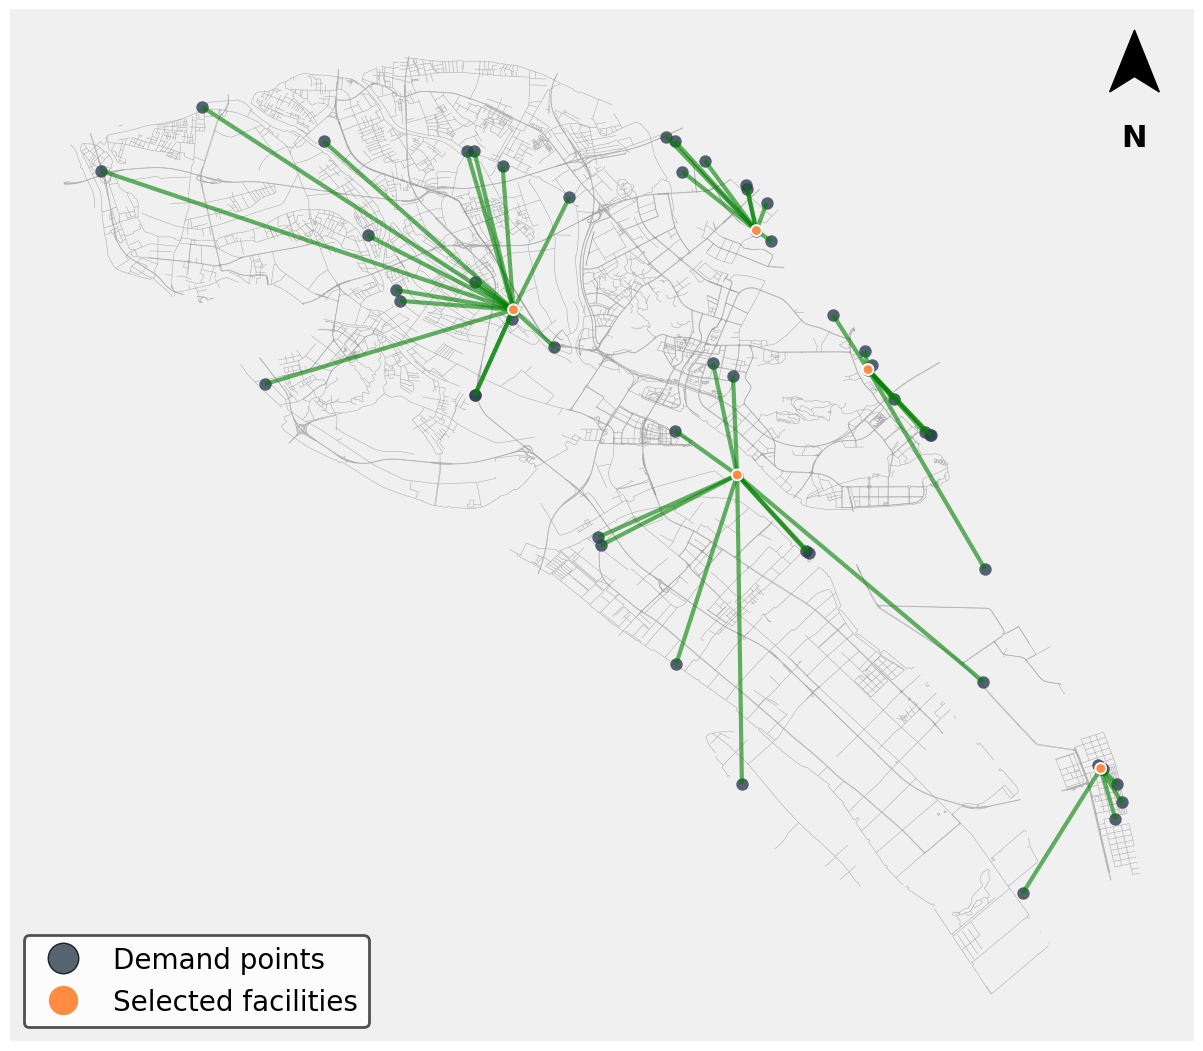

In [27]:
# Demo call for pretty plot (Gurobi)
#try:
#    opt_sites = cand_df.loc[selected_sites]
#except Exception:
#    opt_sites = cand_df.iloc[:30]
ls = poi[['lon','lat']].copy()

# 估计中心纬度用于换算（经纬度数据时）
approx_lat = float(ls['lat'].mean()) if 'lat' in ls.columns else float(ls['Y'].mean())

ax = plot_result_pretty(
    #ls_hlt,
    ls,
    center_points,
    radius_m=550,
    roads_path="D:\Academic\Task123_HiSpot\hispot-main\data\guangzhou\南沙区路网.shp",
    demand_gridsize=80,
    demand_cmap="inferno",
    roads_color="#9e9e9e", roads_alpha=0.8,
    overlay_points_size=80, overlay_points_alpha=0.8,
    norm_mode="log",
    vmin_q=0.12,
    vmax_q=0.995,
    reduce="sum",
    circle_style="ring",
    show_heat=False,
    #show_heat=True,
    lang="en",
    title="pHub-Optimized Facilities"
)
# 16:9 canvas (for PPT) and save HD image
fig = ax.figure
fig.set_size_inches(20, 11.25)
fig.tight_layout()
ax.set_title('')
for s in ax.spines.values(): s.set_visible(False)
ax.set_xticks([]); ax.set_yticks([])
#ax.set_title("pHub-Optimized Facilities\nHubs: 5", fontsize=18, pad=12)
ax.set_facecolor("#F0F0F0")      # 改坐标区底色
#ax.figure.patch.set_facecolor("#CDAD00")  # 可选：改整张图画布底色


segments = [np.array([points_np[ci], points_np[dj]]) for ci, js in assigns.items() for dj in js]
lc = LineCollection(segments, colors='green', linewidths=3, alpha=0.6, zorder=10)
ax.add_collection(lc)
fig.savefig("pHub-nansha.png", dpi=300, bbox_inches="tight")
plt.show()


In [41]:
# PHub 扩展：可选传入 distance_matrix（用于路网最短路距离）
import numpy as np
from pulp import LpProblem, LpMinimize, LpVariable, lpSum
import importlib
import hispot.FLP.BaseLocate as _BL
importlib.reload(_BL)
from hispot.FLP.BaseLocate import PModel

# 运行时补丁：确保非最优状态时抛出异常（避免返回 None）
try:
    def _patched_show_result(self, prob):
        prob.solve(self.solver)
        status = LpStatus[prob.status]
        print("Status:", status)
        if status != "Optimal":
            raise RuntimeError(f"求解状态为 {status}，无法返回可用解")
        obj = value(prob.objective)
        if self.name == "p-hub":
            self.centers = []
            self.assigns = {}
            for k in range(self.num_points):
                if self.x[k][k].varValue == 1:
                    self.centers.append(k)
                    self.assigns[k] = []
                    for j in range(self.num_points):
                        if self.x[j][k].varValue == 1:
                            self.assigns[k].append(j)
            try:
                import matplotlib.pyplot as plt
                pts = np.asarray(self.points)
                if pts.ndim == 2 and pts.shape[1] >= 2 and len(self.centers) > 0:
                    plt.figure(figsize=(6, 6))
                    plt.scatter(pts[:, 0], pts[:, 1], s=10, c="#4c78a8")
                    for hub_idx in self.centers:
                        for idx in self.assigns.get(hub_idx, []):
                            if idx != hub_idx:
                                plt.plot([pts[idx, 0], pts[hub_idx, 0]],
                                         [pts[idx, 1], pts[hub_idx, 1]],
                                         color="lightgray", linewidth=0.6)
                    plt.scatter(pts[self.centers, 0], pts[self.centers, 1],
                                s=60, c="#f58518", marker="^")
                    plt.title("p-hub assignments")
                    plt.axis('equal')
                    plt.tight_layout()
                    plt.show()
            except Exception:
                pass
            return self.centers, self.assigns, obj
        else:
            # 复用原逻辑的其他分支
            centers, assigns = [], {}
            for i in range(self.num_points):
                if self.x[i].varValue == 1:
                    centers.append(i)
                    assigns[i] = []
                    for j in range(self.num_points):
                        if j != i and getattr(self, 'y', {}).get(j, {}).get(i, None) is not None:
                            try:
                                if self.y[j][i].varValue == 1:
                                    assigns[i].append(j)
                            except Exception:
                                pass
            return centers, assigns, obj
    _BL.PModel.show_result = _patched_show_result
except Exception:
    pass

class PHubCustom(PModel):
    def __init__(self, num_points, points, solver,
                 num_located=None, weight=None,
                 collect_cost=1.0, transfer_cost=1.0, distribution_cost=1.0,
                 distance_matrix=None, num_hubs=None):
        # 兼容两种参数名：num_located / num_hubs
        p = num_hubs if num_hubs is not None else num_located
        super().__init__(num_points, points, solver, p)
        self.distance = distance_matrix  # 若为 None，则回退到欧氏距离
        self.weight = weight             # 货流矩阵 W_ij（可选）
        self.PC = collect_cost           # 收集成本
        self.PT = transfer_cost          # 中转成本
        self.PD = distribution_cost      # 配送成本
        self.x = None
        self.y = None
        self.name = 'p-hub'

    def prob_solve(self):
        # 1) 距离矩阵：未提供则按欧氏距离
        if self.distance is None:
            self.distance = np.linalg.norm(
                self.points[:, None, :] - self.points[None, :, :], axis=2
            )
        N = self.num_points
        if self.distance.shape != (N, N):
            raise ValueError(f"distance_matrix 形状应为 {(N, N)}，当前为 {self.distance.shape}")
        # 自距离恒为 0
        np.fill_diagonal(self.distance, 0.0)
        is_finite = np.isfinite(self.distance)

        # 2) 流量矩阵：未提供则默认全 1（对角置 0）
        if self.weight is None:
            self.weight = np.ones((N, N), dtype=float)
            np.fill_diagonal(self.weight, 0.0)
        if self.weight.shape != (N, N):
            raise ValueError(f"weight 形状应为 {(N, N)}，当前为 {self.weight.shape}")
        # 清洗：不可达(i,j)的流量置 0
        try:
            mask_finite = is_finite
            self.weight = self.weight.copy()
            self.weight[~mask_finite] = 0.0
            np.fill_diagonal(self.weight, 0.0)
        except Exception:
            pass
        Oi = np.sum(self.weight, axis=1)  # 起始流量
        Di = np.sum(self.weight, axis=0)  # 终止流量

        # 3) 决策变量
        prob = LpProblem("p-Hub_Problem", LpMinimize)
        Zones = list(range(N))
        x = LpVariable.dicts("x", (Zones, Zones), cat="Binary")                  # 分配：i -> hub k
        y = LpVariable.dicts("y", (Zones, Zones, Zones), lowBound=0, cat="Continuous")  # 流量：i 经 k->h
        self.x, self.y = x, y

        # 4) 目标函数：收集 + 中转 + 配送（仅累加有限距离对）
        obj_collect = lpSum(self.PC * float(self.distance[i, k]) * x[i][k] * float(Oi[i])
                            for i in Zones for k in Zones if is_finite[i, k])
        obj_transfer = lpSum(self.PT * float(self.distance[k, h]) * y[i][k][h]
                             for i in Zones for k in Zones for h in Zones if is_finite[k, h])
        obj_distrib = lpSum(self.PD * float(self.distance[k, i]) * x[i][k] * float(Di[i])
                            for i in Zones for k in Zones if is_finite[k, i])
        prob += obj_collect + obj_transfer + obj_distrib

        # 5) 约束
        # 5.1 每个 i 恰分配给 1 个可达 hub；不可达对强制为 0
        for i in Zones:
            reachable_k = [k for k in Zones if is_finite[i, k] and is_finite[k, i]]
            if not reachable_k:
                raise ValueError(f"点 {i} 对任何 hub 都不可达（distance_matrix 第 {i} 行/列含 inf/NaN）")
            prob += lpSum(x[i][k] for k in reachable_k) == 1
            for k in Zones:
                if k not in reachable_k:
                    prob += (x[i][k] == 0)

        # 5.2 分配-建站一致性：x[i,k] ≤ x[k,k]
        for i in Zones:
            for k in Zones:
                if is_finite[i, k] and is_finite[k, i]:
                    prob += x[i][k] <= x[k][k]

        # 5.3 流量守恒（Campbell 1996）：对每个 i,k
        for i in Zones:
            for k in Zones:
                # 仅允许 hub-到-hub 流动；禁止经过不可达的 k->h 或 h->k
                for h in Zones:
                    if not is_finite[k, h]:
                        prob += (y[i][k][h] == 0)
                    # hub 门控：k 和 h 必须为 hub
                    prob += y[i][k][h] <= float(Oi[i]) * x[k][k]
                    prob += y[i][k][h] <= float(Oi[i]) * x[h][h]
                lhs = lpSum(y[i][k][h] for h in Zones if is_finite[k, h]) - \
                      lpSum(y[i][h][k] for h in Zones if is_finite[h, k])
                rhs = float(Oi[i]) * x[i][k] - lpSum(float(self.weight[i][j]) * x[j][k] for j in Zones if is_finite[j, k])
                prob += (lhs == rhs)
                # 5.4 出流上界
                prob += lpSum(y[i][k][h] for h in Zones if is_finite[k, h]) <= float(Oi[i]) * x[i][k]

        # 5.5 Hub 数量
        prob += lpSum(x[k][k] for k in Zones) == self.num_located

        return self.show_result(prob)

# 关键：把 Notebook 里的 PHub 名称指向扩展后的类，原有调用可直接复用
PHub = PHubCustom

In [42]:
# 路网 -> 图 -> 距离矩阵与路径生成
# 依赖：geopandas, shapely>=2.0, networkx, momepy(可选)
import geopandas as gpd
import shapely
from shapely.geometry import Point, LineString, MultiLineString
from shapely.ops import nearest_points, unary_union
import networkx as nx
import numpy as np
from typing import Tuple, Dict, List

# -------- 工具：投影到米制 --------
def to_metric_gdf(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    if gdf.crs is None:
        raise ValueError("路网缺少 CRS，请在 read_clean_roads(..., assumed_crs=...) 指定或给 shapefile 提供 .prj")
    if gdf.empty or gdf.geometry.is_empty.all():
        raise ValueError("路网几何为空，检查数据或清洗流程")
    crs_obj = gdf.crs
    if getattr(crs_obj, "is_geographic", False):
        metric_crs = gdf.estimate_utm_crs()
        return gdf.to_crs(metric_crs)
    else:
        return gdf

# -------- 工具：读取并清洗路网 --------
def read_clean_roads(roads_path: str, assumed_crs=None) -> gpd.GeoDataFrame:
    roads = gpd.read_file(roads_path)
    if roads.crs is None and assumed_crs is not None:
        roads = roads.set_crs(assumed_crs)
    roads = roads[roads.geometry.type.isin(["LineString", "MultiLineString"])].copy()
    roads = roads.explode(index_parts=False).reset_index(drop=True)
    roads = roads[roads.geometry.notnull()].copy()
    roads = to_metric_gdf(roads)
    roads = roads[roads.length > 0]
    roads = roads[~roads.geometry.is_empty]
    return roads

# -------- 拓扑“打结”：在所有交点处切割线，生成 fully-noded 线段 --------
def node_and_split_lines(roads: gpd.GeoDataFrame, snap_tolerance: float=None) -> gpd.GeoDataFrame:
    U = unary_union(list(roads.geometry))  # 在交点处打结
    if snap_tolerance is not None and snap_tolerance > 0:
        try:
            U = shapely.snap(U, U, snap_tolerance)
        except Exception:
            pass
    lines = []
    if isinstance(U, LineString):
        lines = [U]
    elif isinstance(U, MultiLineString):
        lines = list(U.geoms)
    else:
        # GeometryCollection 的情况，提取其中的线
        try:
            lines = [g for g in U.geoms if isinstance(g, (LineString,))]
        except Exception:
            lines = []
    return gpd.GeoDataFrame(geometry=lines, crs=roads.crs)

# -------- 建图：使用 fully-noded 线段 --------
def build_graph_from_lines_noded(lines_gdf: gpd.GeoDataFrame, directed: bool=False) -> nx.Graph:
    G = nx.DiGraph() if directed else nx.Graph()
    for geom in lines_gdf.geometry:
        if isinstance(geom, LineString):
            coords = list(geom.coords)
            for u, v in zip(coords[:-1], coords[1:]):
                seg = LineString([u, v])
                length = float(seg.length)
                G.add_edge(u, v, weight=length, geometry=seg)
    return G

# -------- 点吸附：到最近 fully-noded 边并插入节点 --------
def snap_point_to_graph(point_xy: Tuple[float, float], roads_for_snap: gpd.GeoDataFrame, G: nx.Graph,
                        max_search=5_000) -> Tuple[Tuple[float, float], List[Tuple[float, float]]]:
    p = Point(point_xy)
    bbox = p.buffer(max_search)
    candidates = roads_for_snap[roads_for_snap.intersects(bbox)]
    if candidates.empty:
        idx = roads_for_snap.distance(p).idxmin()
        line = roads_for_snap.loc[idx, 'geometry']
    else:
        idx = candidates.distance(p).idxmin()
        line = candidates.loc[idx, 'geometry']

    proj_dist = line.project(p)
    snapped = line.interpolate(proj_dist)
    sp = (snapped.x, snapped.y)

    # 在线上找到所在段的端点，以便在图中拆分对应边
    coords = list(line.coords)
    acc = 0.0
    inserted_edges = []
    prev = coords[0]
    for nxt in coords[1:]:
        seg = LineString([prev, nxt])
        seg_len = seg.length
        if acc + seg_len >= proj_dist - 1e-9:
            # 在图中拆分这个边（若存在）
            if G.has_edge(prev, nxt):
                G.remove_edge(prev, nxt)
            # 添加两条边连接到新节点
            G.add_edge(prev, sp, weight=float(LineString([prev, sp]).length), geometry=LineString([prev, sp]))
            G.add_edge(sp, nxt, weight=float(LineString([sp, nxt]).length), geometry=LineString([sp, nxt]))
            inserted_edges.extend([(prev, sp), (sp, nxt)])
            break
        acc += seg_len
        prev = nxt
    return sp, inserted_edges

# -------- 最短路与路径几何 --------

def shortest_path_and_length(G: nx.Graph, s: Tuple[float,float], t: Tuple[float,float]):
    path = nx.shortest_path(G, s, t, weight='weight')
    lines = []
    length = 0.0
    for u, v in zip(path[:-1], path[1:]):
        data = G.get_edge_data(u, v)
        geom = data.get('geometry', LineString([u, v]))
        lines.append(geom)
        length += data.get('weight', geom.length)
    return length, shapely.line_merge(shapely.geometry.MultiLineString(lines)), path

# -------- 批量生成矩阵与路径 --------

def network_distance_matrix(points_xy: np.ndarray, roads_path: str,
                            directed: bool=False, return_paths: bool=True,
                            roads_assumed_crs=None, points_crs=None,
                            snap_tolerance: float=None):
    # 1) 读路网、投影并打结
    roads = read_clean_roads(roads_path, assumed_crs=roads_assumed_crs)
    lines_noded = node_and_split_lines(roads, snap_tolerance=snap_tolerance)
    G = build_graph_from_lines_noded(lines_noded, directed=directed)

    # 1.5) 点坐标投影到与路网一致
    if points_crs is not None:
        gdf_pts = gpd.GeoDataFrame(geometry=[Point(xy) for xy in points_xy], crs=points_crs)
        gdf_pts = gdf_pts.to_crs(roads.crs)
        points_xy = np.array([[pt.x, pt.y] for pt in gdf_pts.geometry])

    # 2) 吸附所有点到图（插入节点）
    snapped_nodes = []
    for xy in points_xy:
        sp, _ = snap_point_to_graph(tuple(xy), lines_noded, G)
        snapped_nodes.append(sp)

    snapped_nodes = [tuple(xy) for xy in snapped_nodes]
    n = len(snapped_nodes)
    D = np.zeros((n, n), dtype=float)
    paths_geom = [[None]*n for _ in range(n)] if return_paths else None

    # 3) 逐对最短路
    for i in range(n):
        for j in range(n):
            if i == j:
                D[i, j] = 0.0
                if return_paths:
                    paths_geom[i][j] = LineString([snapped_nodes[i], snapped_nodes[j]])
                continue
            try:
                d, geom, _ = shortest_path_and_length(G, snapped_nodes[i], snapped_nodes[j])
            except nx.NetworkXNoPath:
                d, geom = np.inf, None
            D[i, j] = d
            if return_paths:
                paths_geom[i][j] = geom
    return D, paths_geom, snapped_nodes, G

方法C：保留最大分量中的点 43/54 (79.6%)
p = 43
Status: Optimal


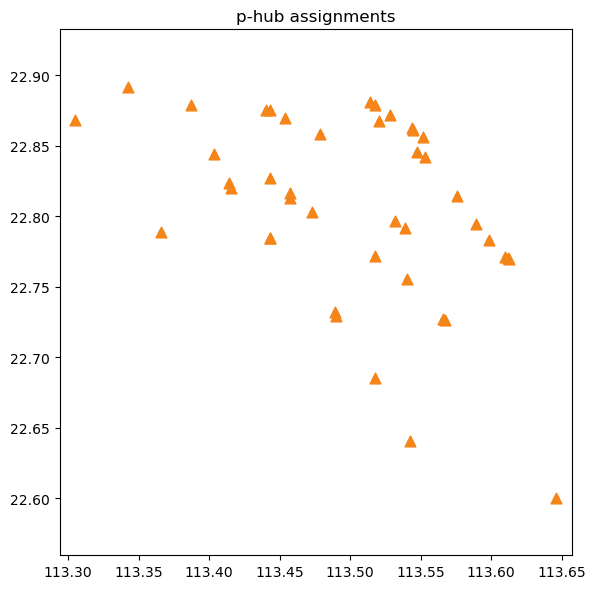

Hubs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Objective (total cost): 23053946.440643013


In [43]:
# 方法 C：仅保留最大连通分量中的点进行 p-hub 求解
# 请确认安装：geopandas, shapely>=2.0, networkx

roads_path = r"D:\Academic\Task123_HiSpot\hispot-main\data\guangzhou\南沙区路网.shp"

# 1) 生成路网最短路距离矩阵（可按需加一点容差修复微小断缝）
D_net, paths_geom, snapped_nodes, G = network_distance_matrix(
    points_np,
    roads_path,
    directed=False,
    return_paths=True,
    points_crs="EPSG:4326",
    snap_tolerance=3.0
)

# 2) 仅保留最大连通分量中的点（方法 C）
import numpy as np, networkx as nx
components = list(nx.connected_components(G))
sizes = [len(c) for c in components]
gi = int(np.argmax(sizes))
nodes_giant = components[gi]
mask = [tuple(snapped_nodes[i]) in nodes_giant for i in range(len(snapped_nodes))]

# 子集化数据
def submat(M, m):
    idx = np.nonzero(m)[0]
    return M[np.ix_(idx, idx)]

points_np_sub = points_np[mask]
weight_sub = submat(weight, np.array(mask))
D_sub = submat(D_net, np.array(mask))
paths_geom_sub = [[paths_geom[i][j] for j in range(len(mask)) if mask[j]]
                  for i in range(len(mask)) if mask[i]]
snapped_nodes_sub = [snapped_nodes[i] for i in range(len(mask)) if mask[i]]

print(f"方法C：保留最大分量中的点 {points_np_sub.shape[0]}/{len(points_np)} ({points_np_sub.shape[0]/len(points_np):.1%})")

# 用子集替换后续使用的变量
points_np = points_np_sub
weight = weight_sub
D_net = D_sub
paths_geom = paths_geom_sub
snapped_nodes = snapped_nodes_sub

# 3) 调整 hub 数并求解
from pulp import PULP_CBC_CMD
p_sub = int(min(max(1, num_hubs), points_np.shape[0]))
print(f"p = {p_sub}")

hubs, assigns, obj = PHub(
    num_points=points_np.shape[0],
    points=points_np,
    solver=PULP_CBC_CMD(),
    num_hubs=p_sub,
    distance_matrix=D_net,
    weight=weight,
    collect_cost=PC,
    transfer_cost=PT,
    distribution_cost=PD
).prob_solve()

print("Hubs:", hubs)
print("Objective (total cost):", obj)

In [44]:
# 诊断：图连通性与距离矩阵不可达比例（p-hub）
import numpy as np
import networkx as nx

# 1) 图规模
try:
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    print(f"Graph nodes/edges: {n_nodes}, {n_edges}")
except Exception as e:
    print(f"Graph info error: {e}")

# 2) 连通分量与巨型分量占比
try:
    comps = list(nx.connected_components(G))
    num_components = len(comps)
    largest = max((len(c) for c in comps), default=0)
    giant_ratio = (largest / n_nodes) if n_nodes and n_nodes > 0 else float('nan')
    print(f"Connected components: {num_components}")
    print(f"Largest component size/ratio: {largest} / {giant_ratio:.3f}")
except Exception as e:
    print(f"Components calc error: {e}")

# 3) 距离矩阵不可达比例（不含对角线）
try:
    n = D_net.shape[0]
    offdiag = ~np.eye(n, dtype=bool)
    inf_ratio = np.isinf(D_net[offdiag]).mean().item()
    finite_vals = D_net[offdiag & np.isfinite(D_net)]
    print(f"Inf ratio in D_net (off-diagonal): {inf_ratio:.3%}")
    if finite_vals.size > 0:
        q25, q50, q75 = np.quantile(finite_vals, [0.25, 0.5, 0.75])
        print(f"Finite distance quartiles (25/50/75%): {q25:.2f} / {q50:.2f} / {q75:.2f}")
except Exception as e:
    print(f"D_net stats error: {e}")

# 4) 每个中心实际绘制的路径数量
try:
    centers_list = hubs if 'hubs' in globals() else (centers if 'centers' in globals() else [])
    for ci in centers_list:
        js = assigns.get(ci, []) if 'assigns' in globals() else []
        n_total = len(js)
        n_drawn = sum(1 for dj in js if 'paths_geom' in globals() and paths_geom[dj][ci] is not None)
        print(f"center {ci}: assigned={n_total}, drawn={n_drawn}")
except Exception as e:
    print(f"Per-center draw stats error: {e}")



Graph nodes/edges: 36568, 40679
Connected components: 42
Largest component size/ratio: 35130 / 0.961
Inf ratio in D_net (off-diagonal): 0.000%
Finite distance quartiles (25/50/75%): 10960.63 / 16330.72 / 21720.66
center 0: assigned=1, drawn=1
center 1: assigned=1, drawn=1
center 2: assigned=1, drawn=1
center 3: assigned=1, drawn=1
center 4: assigned=1, drawn=1
center 5: assigned=1, drawn=1
center 6: assigned=1, drawn=1
center 7: assigned=1, drawn=1
center 8: assigned=1, drawn=1
center 9: assigned=1, drawn=1
center 10: assigned=1, drawn=1
center 11: assigned=1, drawn=1
center 12: assigned=1, drawn=1
center 13: assigned=1, drawn=1
center 14: assigned=1, drawn=1
center 15: assigned=1, drawn=1
center 16: assigned=1, drawn=1
center 17: assigned=1, drawn=1
center 18: assigned=1, drawn=1
center 19: assigned=1, drawn=1
center 20: assigned=1, drawn=1
center 21: assigned=1, drawn=1
center 22: assigned=1, drawn=1
center 23: assigned=1, drawn=1
center 24: assigned=1, drawn=1
center 25: assigned=1,

In [45]:
# 可视化：按中心-分配对绘制路网路径（不同 center 不同颜色）
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


def plot_assign_paths(points_np, centers, assigns, paths_geom, snapped_nodes=None, roads_gdf=None,
                      title=None, colors=None, cmap='Dark2', linewidth=2.5, alpha=0.9,
                      color_demands_by_center=False):
    fig, ax = plt.subplots(figsize=(8, 8))
    if roads_gdf is not None:
        roads_gdf.plot(ax=ax, color="#B0B0B0", linewidth=0.6, alpha=0.7)

    # 颜色映射：每个 center 一个颜色（默认使用不含灰的 Set1 调色板）
    if colors is None:
        cmap_obj = plt.get_cmap(cmap, max(1, len(centers)))
        colors = [cmap_obj(i) for i in range(len(centers))]
        # 过滤灰色（若存在），简单规则：r,g,b 三通道差值都很小且接近中间值
        def is_gray(c):
            r, g, b = c[:3]
            return (abs(r-g) < 0.03 and abs(r-b) < 0.03 and abs(g-b) < 0.03 and 0.3 < r < 0.8)
        colors = [c for c in colors if not is_gray(c)] or colors

    # 绘制路径（按中心着色），不进入图例
    for idx, ci in enumerate(centers):
        color_i = colors[idx % len(colors)]
        segs = []
        js = assigns.get(ci, [])
        for dj in js:
            geom = paths_geom[dj][ci]
            if geom is not None:
                if hasattr(geom, 'geoms'):
                    for g in geom.geoms:
                        segs.append(np.array(g.coords))
                else:
                    segs.append(np.array(geom.coords))
        if segs:
            lc = LineCollection(segs, colors=[color_i], linewidths=linewidth, alpha=alpha, zorder=10)
            ax.add_collection(lc)

    # 需求点（按中心着色，统一白色描边，圆形）
    if color_demands_by_center:
        painted = set()
        for idx, ci in enumerate(centers):
            color_i = colors[idx % len(colors)]
            js = assigns.get(ci, [])
            group = js + [ci]
            group = [k for k in group if 0 <= k < len(points_np)]
            if not group:
                continue
            ax.scatter(points_np[group, 0], points_np[group, 1], c=[color_i], s=20,
                       edgecolors='k', linewidths=0.9, zorder=20)
            painted.update(group)
        rest = [k for k in range(len(points_np)) if k not in painted]
        if rest:
            ax.scatter(points_np[rest, 0], points_np[rest, 1], c='#9ecae1', s=18,
                       edgecolors='k', linewidths=0.8, zorder=19)
    else:
        ax.scatter(points_np[:, 0], points_np[:, 1], c='tab:blue', s=20,
                   edgecolors='k', linewidths=0.8, zorder=20)

    # 中心点（星形，统一黑色描边）
    for idx, ci in enumerate(centers):
        color_i = colors[idx % len(colors)]
        ax.scatter(points_np[ci, 0], points_np[ci, 1], c=[color_i], s=80, marker='*',
                   edgecolors='k', linewidths=0.6, zorder=30)

    # 自定义图例：仅展示形状（不标注各 center 的颜色）
    from matplotlib.lines import Line2D
    handles = [
        Line2D([0], [0], marker='o', color='none', markerfacecolor='#9ecae1',
               markeredgecolor='k', markeredgewidth=1.0, markersize=7, label='Facilities'),
        Line2D([0], [0], marker='*', color='none', markerfacecolor='#ffcc00',
               markeredgecolor='k', markeredgewidth=0.7, markersize=10, label='Centers'),
    ]
    ax.legend(handles=handles, frameon=False, loc='best')

    # 不显示标题
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([]); ax.set_yticks([])
    plt.show()

# 使用示例
# roads_gdf = read_clean_roads(roads_path)
# plot_assign_paths(points_np, centers, assigns, paths_geom, roads_gdf=roads_gdf,
#                   title='pCenter with network distances', color_demands_by_center=False)

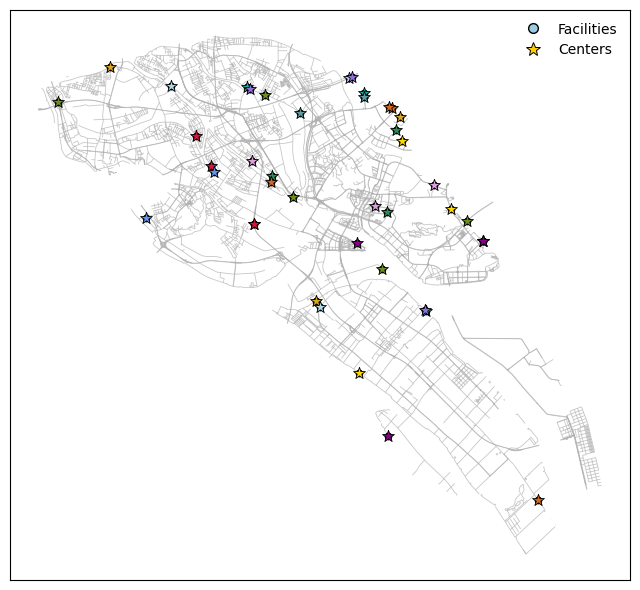

In [46]:
%matplotlib inline
roads_gdf = read_clean_roads(roads_path, assumed_crs="EPSG:4326")  # 若路网缺CRS且是WGS84
my_colors = [
    '#D2691E', '#5F9EA0', '#DC143C', '#6495ED', '#6B8E23','#8B008B',  # 5 个主色
    '#FFD700', '#DAA520', '#ADD8E6', '#20B2AA', '#9370D8', '#6B8E23', '#DDA0DD', '#2E8B57'  # 备用
]
plot_assign_paths(
    points_np=np.array(snapped_nodes),  # 或者用投影后的点
    centers=hubs,
    assigns=assigns,
    paths_geom=paths_geom,
    roads_gdf=roads_gdf,
    title="pHub with network distances",
    colors=my_colors,
    color_demands_by_center=True  # True: 不同center的需求点也跟随着色
)

含需求点的连通分量数 = 1; N = 43; 使用 p = 43（请求 57）
Status: Optimal


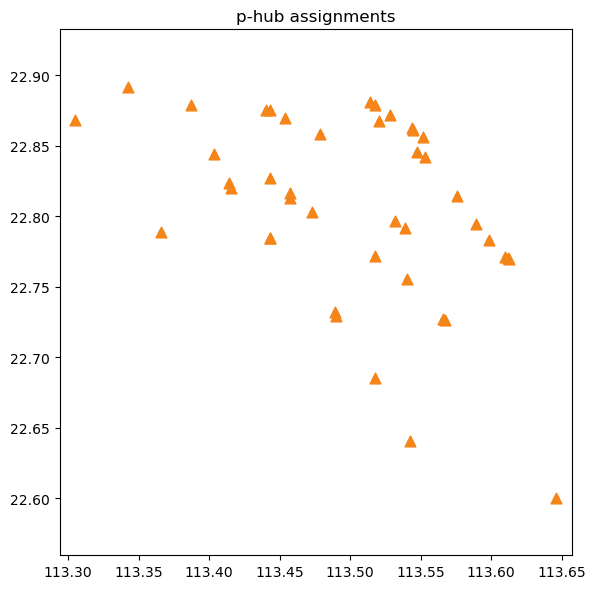

Hubs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Objective (total cost): 23053946.440643013


In [48]:
# 方法 A：保留全部点，清零不可达(i,j)的流量后求解 p-hub（自动裁剪 p≤N）
import numpy as np
import networkx as nx
from pulp import PULP_CBC_CMD

roads_path = r"D:\Academic\Task123_HiSpot\hispot-main\data\guangzhou\南沙区路网.shp"

# 1) 生成网络最短路距离矩阵（适度 snap 容差修复断缝）
D_net, paths_geom, snapped_nodes, G = network_distance_matrix(
    points_np,
    roads_path,
    directed=False,
    return_paths=True,
    points_crs="EPSG:4326",
    snap_tolerance=3.0
)

# 2) 清洗权重：不可达(i,j)对的流量置 0，保持物理一致
W = weight.copy()
mask_finite = np.isfinite(D_net)
W[~mask_finite] = 0.0
np.fill_diagonal(W, 0.0)
weight_clean = W

# 3) 连通性与 p 裁剪（防止 p>N 造成必然不可行）
components = list(nx.connected_components(G))
node_to_comp = {n: idx for idx, comp in enumerate(components) for n in comp}
point_comp_ids = [node_to_comp.get(tuple(snapped_nodes[i]), None) for i in range(len(snapped_nodes))]
num_comps_with_demands = len({c for c in point_comp_ids if c is not None})
N = int(points_np.shape[0])
p_sub = int(min(max(1, int(num_hubs)), N))
print(f"含需求点的连通分量数 = {num_comps_with_demands}; N = {N}; 使用 p = {p_sub}（请求 {num_hubs}）")
if p_sub < num_comps_with_demands:
    print("[提示] p 小于含需求分量数，仍可能不可行；必要时增大 p 或用方法C。")

# 4) 求解（使用裁剪后的 p_sub）
try:
    hubs, assigns, obj = PHub(
        num_points=N,
        points=points_np,
        solver=PULP_CBC_CMD(),
        num_hubs=p_sub,
        distance_matrix=D_net,
        weight=weight_clean,
        collect_cost=PC,
        transfer_cost=PT,
        distribution_cost=PD
    ).prob_solve()
    print("Hubs:", hubs)
    print("Objective (total cost):", obj)
except RuntimeError as e:
    print("求解失败：", e)
    print("建议：1) 适度增大 p；2) 或使用方法C仅保留最大分量；3) 或增大 snap_tolerance。")

